<a href="https://colab.research.google.com/github/mdoghan/CaterpillarCustomerDashboard/blob/main/Catterpilar%20python%20analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
data = pd.read_csv('hmd_python.csv')


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import numpy as np


In [25]:

# Basic data overview
print("First five rows of the data:")
print(data.head())
print("\nSummary of the data:")
print(data.info())


First five rows of the data:
    Invoice   TransactionDate      DeliveryDate EmpKey  ChannelKey StoreID  \
0  E1072592  Tue Jan 01, 2002  Tue Jan 22, 2002    E04           9   IN288   
1  E1072593  Tue Jan 01, 2002  Wed Jan 16, 2002    E12           9   BZ118   
2  E1072594  Tue Jan 01, 2002  Mon Jan 21, 2002    E02           3   NM120   
3  E1072595  Tue Jan 01, 2002  Thu Jan 31, 2002    E07           4   US213   
4  E1072596  Tue Jan 01, 2002  Mon Jan 21, 2002    E03           3   US219   

  ProductKey  CustomerKey  Qty     Cost    Price  \
0     FL-125         72.0  1.0   1472.0   1958.0   
1     RP-243         47.0  1.0   6618.0   9265.0   
2     RD-516         48.0  2.0  10672.0  12593.0   
3     BZ-801         73.0  1.0   3013.0   4007.0   
4     BZ-812         16.0  1.0   7396.0   9171.0   

                         ProductDescription     Brand       Type        Color  \
0  ForkLifts-Bradshaw-HeavyDuty-YellowBlack  Bradshaw  HeavyDuty  YellowBlack   
1    RoadPavers-Raygo-Light

In [37]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

# Check for missing values
print("\nMissing data by column:")
print(data.isnull().sum())



Descriptive statistics:
          ChannelKey    CustomerKey            Qty           Cost  \
count  577537.000000  577536.000000  577536.000000  577536.000000   
mean        5.500520     689.466212       1.005025    6642.553735   
std         2.874628     629.852760       0.517326    5101.164260   
min         1.000000       1.000000       1.000000    1309.000000   
25%         3.000000     204.000000       1.000000    3266.000000   
50%         6.000000     500.000000       1.000000    5643.000000   
75%         8.000000     995.000000       1.000000    7967.000000   
max        10.000000    3953.000000      99.000000   33029.000000   

               Price  
count  577536.000000  
mean     8009.933343  
std      6163.665356  
min      1606.000000  
25%      3881.000000  
50%      6748.000000  
75%      9765.000000  
max     44731.000000  

Missing data by column:
Invoice               0
TransactionDate       0
DeliveryDate          0
EmpKey                0
ChannelKey            0
S

In [35]:
# Drop rows with any missing values
data_cleaned = data.dropna(how='any')

In [36]:
# Confirm missing values have been removed
print("\nMissing data after dropping rows with missing values:")
print(data_cleaned.isnull().sum())


Missing data after dropping rows with missing values:
Invoice               0
TransactionDate       0
DeliveryDate          0
EmpKey                0
ChannelKey            0
StoreID               0
ProductKey            0
CustomerKey           0
Qty                   0
Cost                  0
Price                 0
ProductDescription    0
Brand                 0
Type                  0
Color                 0
CityName              0
CountryName           0
Channel               0
CustomerName          0
Industry              0
dtype: int64


In [38]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())


Descriptive statistics:
          ChannelKey    CustomerKey            Qty           Cost  \
count  577537.000000  577536.000000  577536.000000  577536.000000   
mean        5.500520     689.466212       1.005025    6642.553735   
std         2.874628     629.852760       0.517326    5101.164260   
min         1.000000       1.000000       1.000000    1309.000000   
25%         3.000000     204.000000       1.000000    3266.000000   
50%         6.000000     500.000000       1.000000    5643.000000   
75%         8.000000     995.000000       1.000000    7967.000000   
max        10.000000    3953.000000      99.000000   33029.000000   

               Price  
count  577536.000000  
mean     8009.933343  
std      6163.665356  
min      1606.000000  
25%      3881.000000  
50%      6748.000000  
75%      9765.000000  
max     44731.000000  


In [31]:
# Drop rows/columns or impute missing values
data_cleaned = data.dropna()  # Example: Dropping missing data

#I prepared to drop missind data as the count of missing data was less and wont be impacting the result.

#if the count/ percentage of missing values were higher i would prepare use data.fillna(value) for imputation



In [28]:
import seaborn as sns

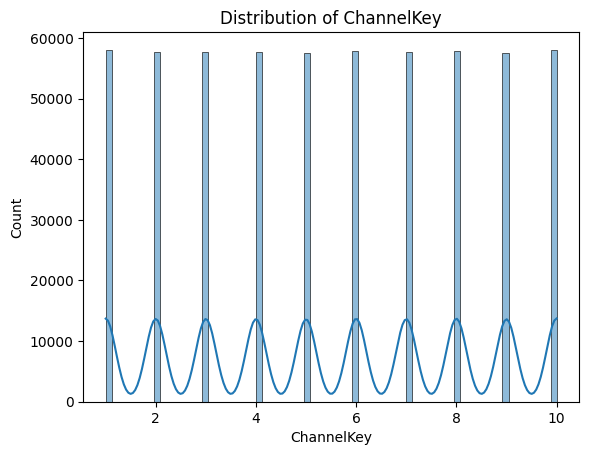

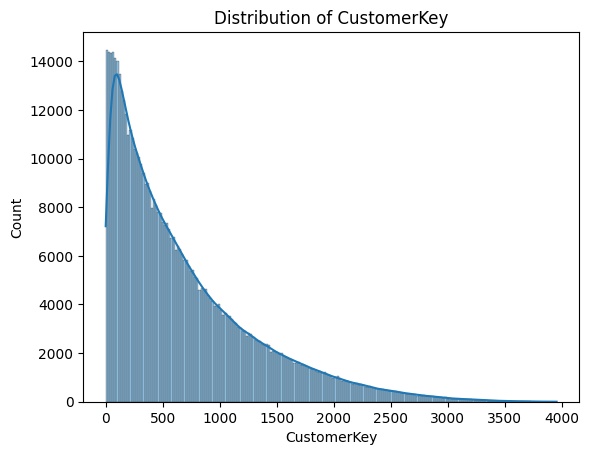

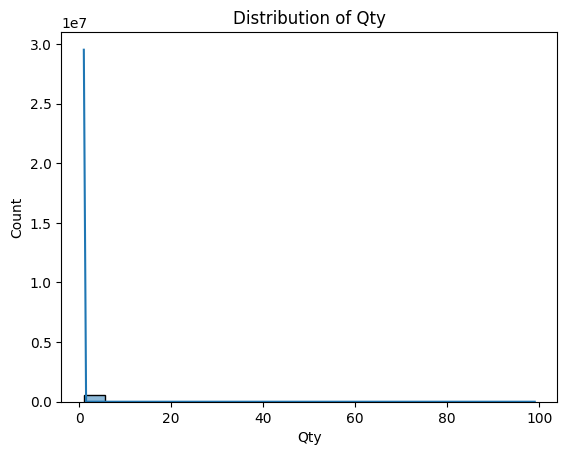

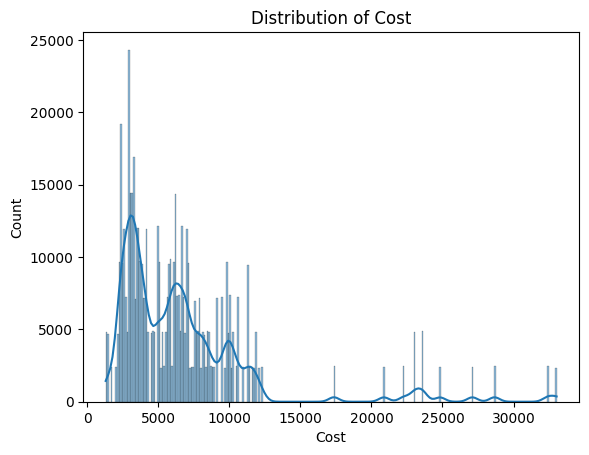

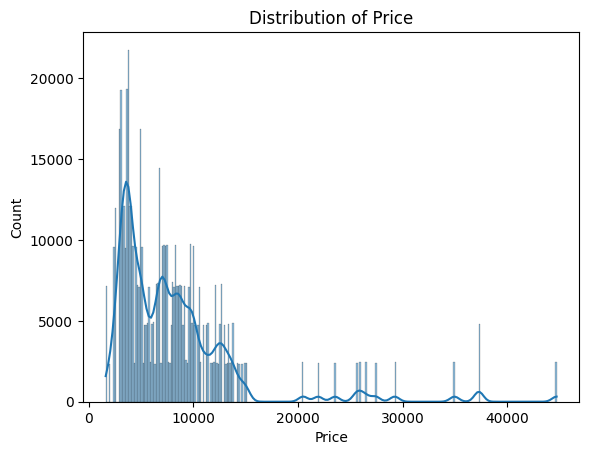

In [34]:
# Visualize distributions
for column in data.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()



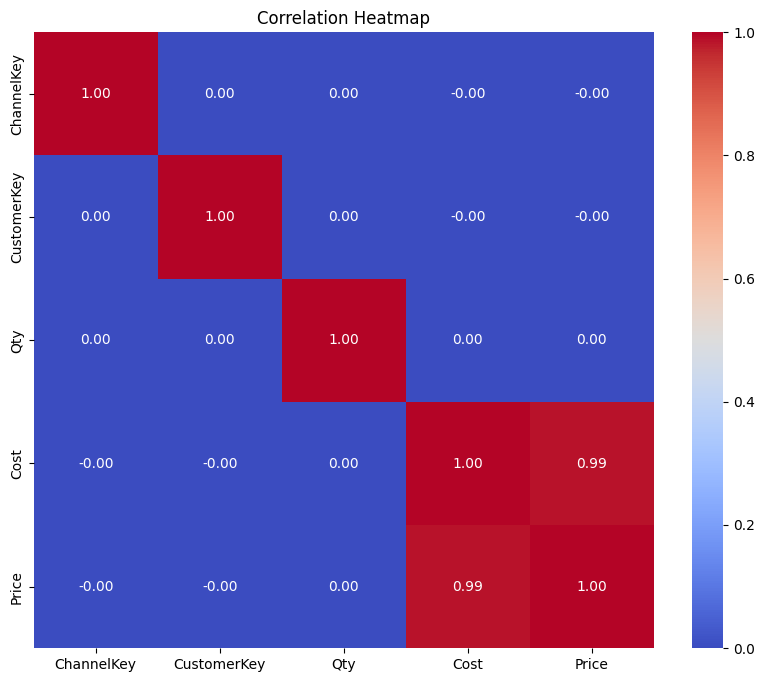

In [39]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Q2:  which products are most profitable?
data['Profit'] = data['Price'] - data['Cost']

top_brands =data.groupby('Brand')['Qty'].sum().nlargest(10).index
top_brands = data[data['Brand'].isin(top_brands)]
most_profitable_products = top_brands.groupby(['Brand', 'ProductDescription'])['Profit'].sum().reset_index()
most_profitable_products = most_profitable_products.sort_values('Profit', ascending=False).drop_duplicates('Brand')


most_profitable_products[['Brand', 'ProductDescription', 'Profit']]




,Brand,ProductDescription,Profit
32,IngersollRand,RockDrillers-IngersollRand-Standard-White,12583943
8,Caterpillar,Dredgers-Caterpillar-LightDuty-Yellow,10458126
1,Bobcat,EarthMovers-Bobcat-LightDuty-RedWhite,10223196
24,Hitachi,DumpTrucks-Hitachi-HeavyDuty-Green,9998014
45,Komatsu,DumpTrucks-Komatsu-HeavyDuty-YellowBlack,8382542
49,Liebherr,Cranes-Liebherr-Standard-Red,8187012
39,JohnDeere,EarthMovers-JohnDeere-Standard-Red,7172968
38,JCB,Tractors-JCB-HeavyDuty-White,7143696
59,Volvo,RoadPavers-Volvo-HeavyDuty-GreenWhite,6225136
20,Ford,MiningTrucks-Ford-LightDuty-Yellow,5932136


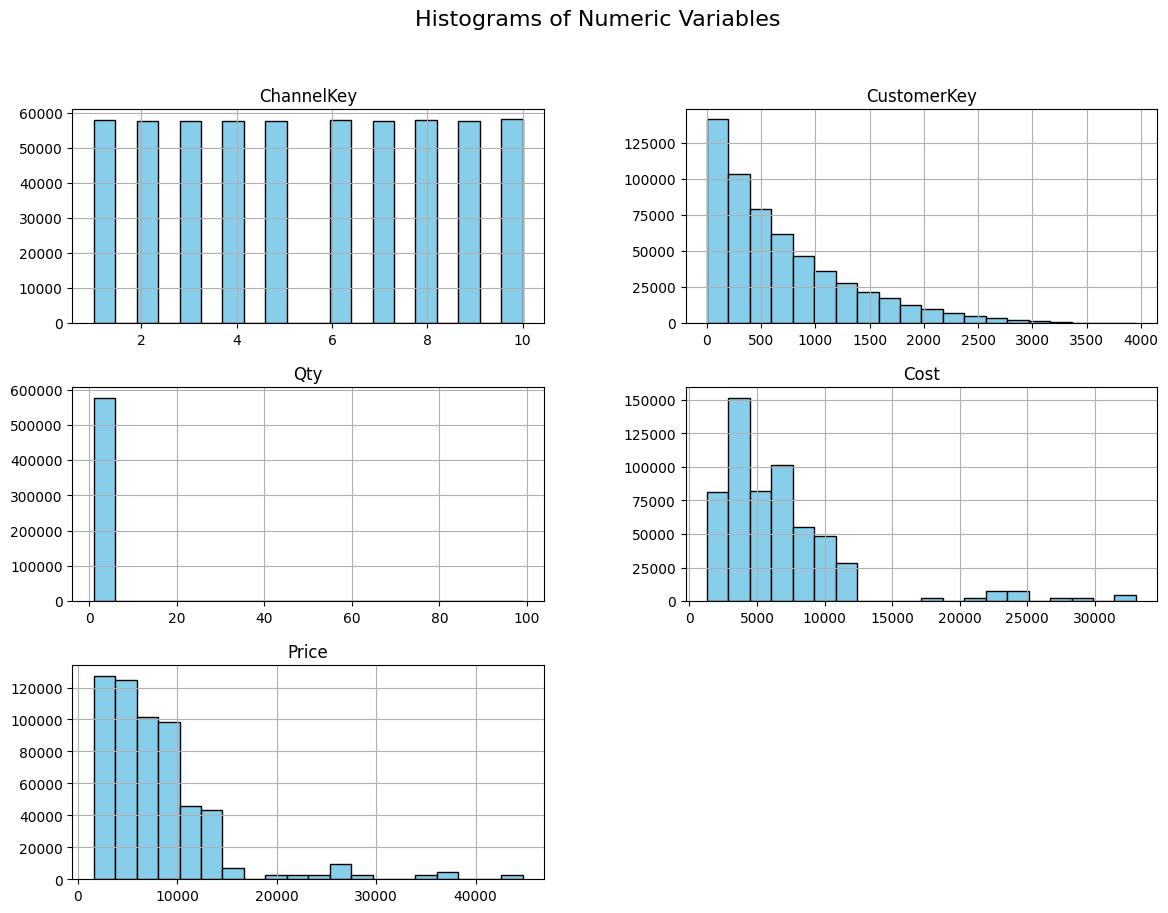

In [ ]:
# Select numeric columns for analysis
numeric_cols = ['ChannelKey', 'CustomerKey', 'Qty', 'Cost', 'Price']

# Plot histograms to observe the distribution of numeric variables
data[numeric_cols].hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Variables', fontsize=16)
plt.show()

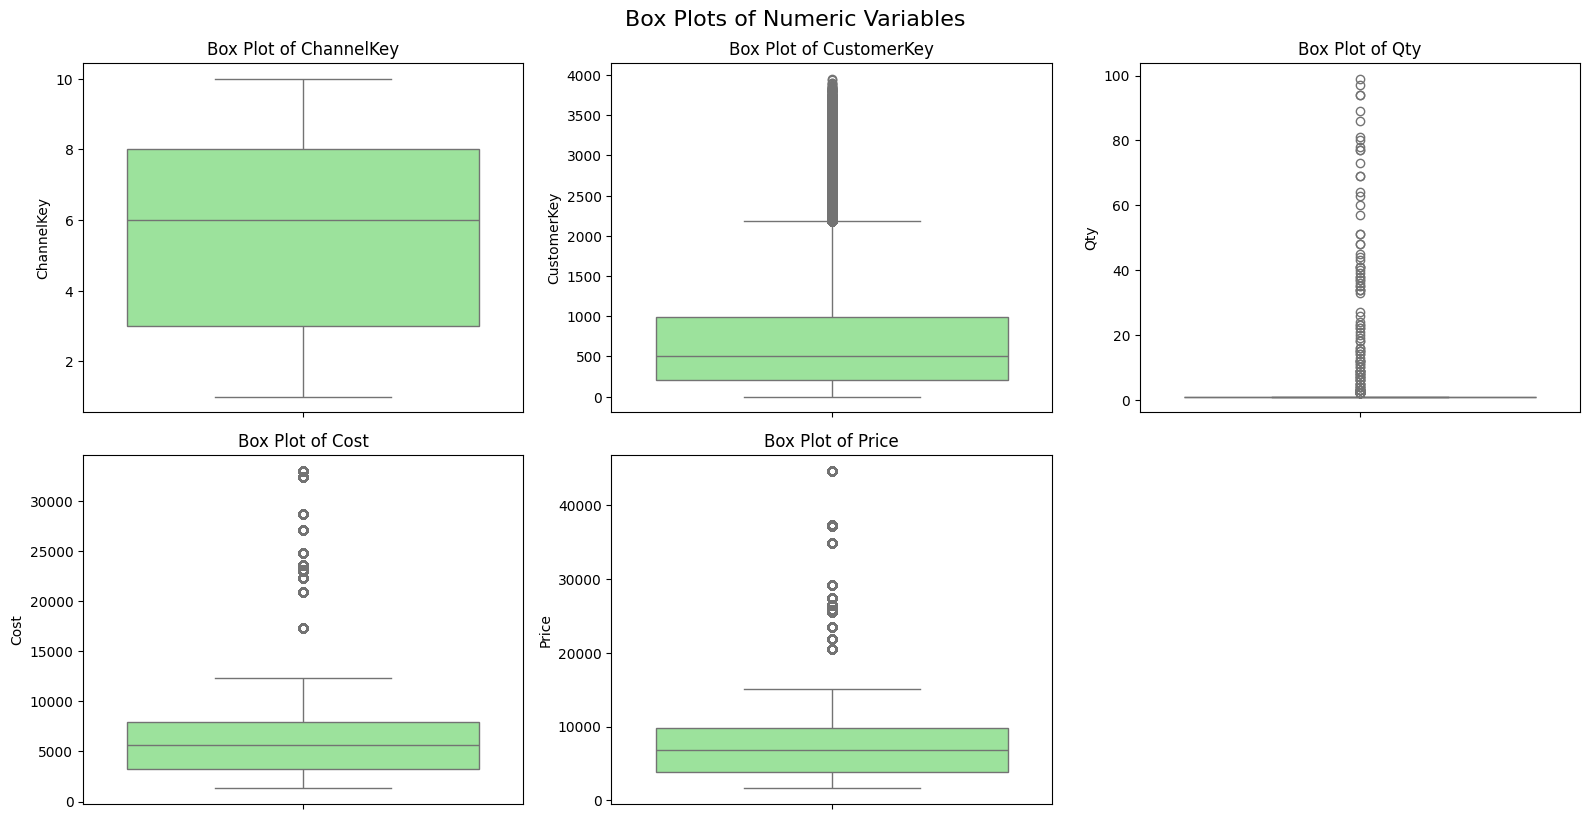

In [ ]:
# Plot box plots to identify outliers
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.suptitle('Box Plots of Numeric Variables', fontsize=16, y=1.02)
plt.show()

In [ ]:
# Statistical detection of outliers using the IQR method
outliers = {}
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]

print("Outliers detected using IQR method:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")

Outliers detected using IQR method:
ChannelKey: 0 outliers
CustomerKey: 20017 outliers
Qty: 115 outliers
Cost: 29096 outliers
Price: 29096 outliers


In [ ]:
# what are the top 3 selling brands?
top_3_brands = data.groupby('Brand')['Qty'].sum().reset_index()


top_selling_brands = top_3_brands.nlargest(3, 'Qty')

print(top_selling_brands)



###  2nd way


# Q1: what are the top 3 selling brands?
top_3_brands = data.groupby('Brand')['Qty'].sum().sort_values(ascending=False).head(3)

print(top_selling_brands)

           Brand    Qty
27   Caterpillar  40567
155        Volvo  23717
72           JCB  20433
           Brand    Qty
27   Caterpillar  40567
155        Volvo  23717
72           JCB  20433


In [ ]:
#way 2
data['Revenue'] = data['Price'] * data['Qty']
data['Profit'] = data['Revenue'] - data['Cost']
profitable_products = data.groupby(['Brand', 'ProductDescription')['Profit'].sum().sort_values(ascending=False).head(10)
print(profitable_products)

Brand       ProductDescription                        
AtlasCopco  OilRigs-AtlasCopco-Standard-Red               41360486
Mollier     OilRigs-Mollier-LightDuty-RedWhite            29322590
Dabuccino   OilRigs-Dabuccino-HeavyDuty-Red               26686595
Polycrest   OilRigs-Polycrest-LightDuty-Green             20714688
Radoil      OilRigs-Radoil-Standard-Red                   14684835
Zeeco       OilRigs-Zeeco-LightDuty-WhiteYellow           14557536
DGFritt     OilRigs-DGFritt-LightDuty-Black               14423546
Robbins     RockDrillers-Robbins-LightDuty-Orange         14225717
AtlasCopco  RockDrillers-AtlasCopco-Standard-Yellow       13453534
Tungaloy    RockDrillers-Tungaloy-Standard-YellowBlack    13300913
Name: Profit, dtype: int64


Text(0.5, 1.0, 'Monthly Sales Trends from 2002 to 2012')

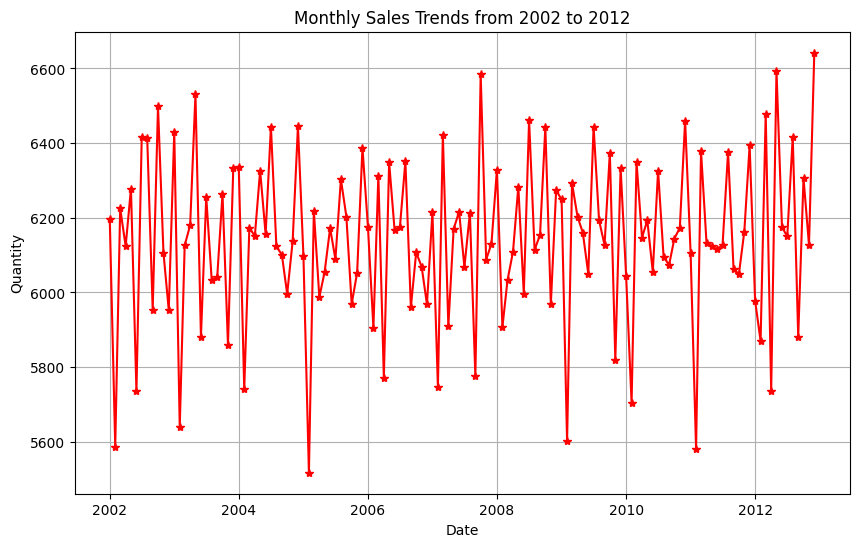

In [ ]:
# Q3 what are the montly sales trends from 2002 to 2012
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

data['Year'] = data['TransactionDate'].dt.year
data['Month'] = data['TransactionDate'].dt.month

sales_btw_2002_2012 = data[(data['Year'] >= 2002) & (data['Year'] <= 2012)]
monthly_sales = sales_btw_2002_2012.groupby(['Year', 'Month'])['Qty'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year','Month']].assign(day=1))

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Qty'], marker='*', linestyle='-', color='red')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Monthly Sales Trends from 2002 to 2012')




In [ ]:
# Q4   what are the most effective marketing channels?
marketing_channels = data.groupby('Channel')['Price'].sum().reset_index()
marketing_channels = marketing_channels.sort_values(by='Price', ascending=False)

print(marketing_channels)


          Channel      Price
7     SocialMedia  650392736
9         Website  649297674
5         Quality  647896846
4      OnSiteDemo  647845154
6        RoadShow  647329334
3        Magazine  647040406
1  CustomerReview  644770648
2  InternetReview  643791193
8      Television  642157240
0        Brochure  638914845


In [ ]:
# Q5 which regions are driving the most sales?
Region_with_high_sales = data.groupby('CountryName')['Price'].sum().reset_index()
Region_with_high_sales = Region_with_high_sales.sort_values(by='Price', ascending=False).head(5)

print(Region_with_high_sales)



#2nd way
Region_with_high_sales = data.groupby('CityName')['Price'].sum().reset_index()
Region_with_high_sales = Region_with_high_sales.sort_values(by='Price', ascending=False).head(5)

print(Region_with_high_sales)





   CountryName      Price
34          US  697506179
1    Australia  545437650
12       India  312055952
32         UAE  311026620
4        China  310623034
     CityName     Price
45  Melbourne  79609705
34     Kigali  79509927
76      Tunis  79438303
36    Kolkata  79181877
73     Taipei  79054103


In [ ]:
#  PRODUCT ANALYSIS

# Q1 what are the most popular products
most_popular_products = data.groupby('ProductKey')['Qty'].sum().sort_values(ascending=False).head(3)

print(most_popular_products)

ProductKey
EM-693    3540
WT-218    3519
CT-721    3519
Name: Qty, dtype: int32


In [ ]:
# Q2 which products are trending?
trending_products = data.groupby('ProductKey')['Qty'].sum().sort_values(ascending=False).head(3)

print(trending_products)

ProductKey
EM-693    3540
WT-218    3519
CT-721    3519
Name: Qty, dtype: int32


In [ ]:
# Q3 which products are generating the most revenue?
data['Revenue'] = data['Price'] * data['Qty']
revenue_by_product = data.groupby('ProductKey')['Revenue'].sum().sort_values(ascending=False).head(3)

print(revenue_by_product)

ProductKey
OR-895    150206698
OR-889    127063420
OR-898    125367957
Name: Revenue, dtype: int64


In [ ]:
# Q4 which products have the highest margins?
data['Hight_profit_Margin'] = data['Revenue'] - data['Cost']
margin_by_product = data.groupby('ProductKey')['Hight_profit_Margin'].sum().sort_values(ascending=False).head(3)

print(margin_by_product)

ProductKey
OR-895    41360486
OR-889    29322590
OR-896    26511780
Name: Hight_profit_Margin, dtype: int64


ProductKey
IB-404    11
TB-245    10
LC-201     9
Name: Qty, dtype: int32


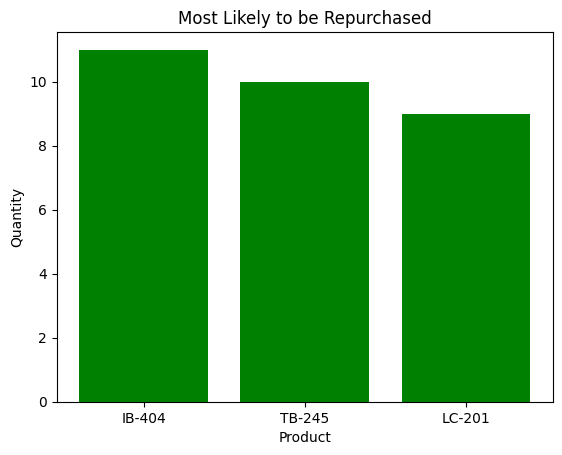

In [ ]:
# Q5 which products are most likely to be repurchased?
repurchased_products = data[data['CustomerKey'] == 1].groupby('ProductKey')['Qty'].sum().sort_values(ascending=False).head(3)

print(repurchased_products)


#visualize
plt.bar(repurchased_products.index, repurchased_products.values, color='Green')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Most Likely to be Repurchased')
plt.show()

In [ ]:
data.shape

(806485, 25)